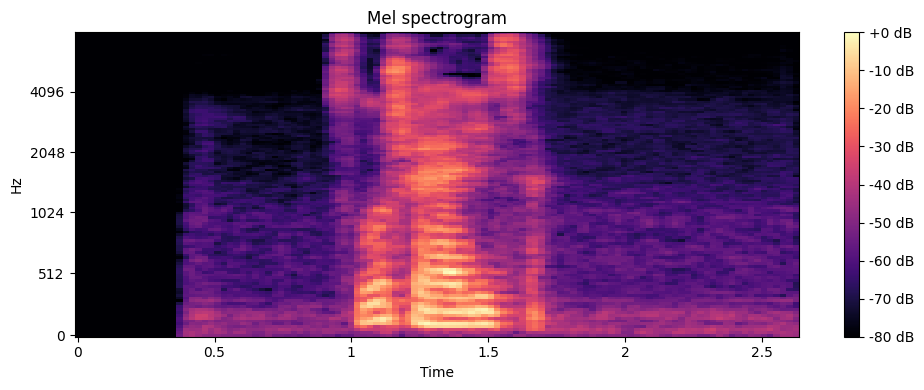

In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
# Загрузить аудио файл
filename = 'train\\0a0b16288ff78515d6c091cfeb813bad.wav'
y, sr = librosa.load(filename)

# Вычислить спектрограмму мел-частот
mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)

# Преобразовать спектрограмму мел-частот в логарифмическую шкалу (дБ)
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

# Нарисовать спектрограмму мел-частот
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spec_db, sr=sr, x_axis='time', y_axis='mel', fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()
plt.show()


In [14]:
import os
import librosa
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis, entropy
from tqdm import tqdm

# Функция для вычисления статистических характеристик
def calculate_statistics(spec):
    meanfreq = np.mean(spec)
    sd = np.std(spec)
    median = np.median(spec)
    Q25 = np.percentile(spec, 25)
    Q75 = np.percentile(spec, 75)
    IQR = Q75 - Q25
    skewness = skew(spec.flatten())  # flatten to treat the entire spectrogram as a single vector
    kurt = kurtosis(spec.flatten())
    sp_ent = entropy(spec.flatten())
    sfm = np.mean(spec**2) / (np.mean(np.abs(spec))**2)
    return [meanfreq, sd, median, Q25, Q75, IQR, skewness, kurt, sp_ent, sfm]

# Путь к папке с аудиофайлами
train_folder = 'train'

# Инициализировать пустой DataFrame для хранения результатов
all_data = pd.DataFrame()

# Получить список файлов в папке train
files = [f for f in os.listdir(train_folder) if f.endswith('.wav')]

# Обход всех файлов с использованием tqdm
for filename in tqdm(files, desc="Processing audio files"):
    file_path = os.path.join(train_folder, filename)
    # Загрузить аудио файл
    y, sr = librosa.load(file_path)

    # Вычислить спектрограмму мел-частот
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)

    # Преобразовать спектрограмму мел-частот в логарифмическую шкалу (дБ)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

    # Вычислить статистические характеристики для всей спектрограммы
    stats = calculate_statistics(mel_spec_db)

    # Преобразовать список статистических характеристик в DataFrame
    columns = ['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm']
    stats_df = pd.DataFrame([stats], columns=columns)

    # Добавить имя файла как дополнительный столбец для идентификации
    stats_df['filename'] = filename

    # Добавить данные в общий DataFrame
    all_data = pd.concat([all_data, stats_df], ignore_index=True)

# Сохранить объединенный DataFrame в CSV файл
all_data.to_csv('mel_spectrogram_statistics_dataset.csv', index=False)

print("Mel spectrogram statistics dataset has been saved to 'mel_spectrogram_statistics_dataset.csv'")


Mel spectrogram statistics dataset has been saved to 'mel_spectrogram_statistics_dataset.csv'


In [16]:
df=pd.read_csv('mel_spectrogram_statistics_dataset.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13936 entries, 0 to 13935
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  13936 non-null  float64
 1   sd        13936 non-null  float64
 2   median    13936 non-null  float64
 3   Q25       13936 non-null  float64
 4   Q75       13936 non-null  float64
 5   IQR       13936 non-null  float64
 6   skew      13936 non-null  float64
 7   kurt      13936 non-null  float64
 8   sp.ent    13936 non-null  float64
 9   sfm       13936 non-null  float64
 10  filename  13936 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.2+ MB


In [17]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

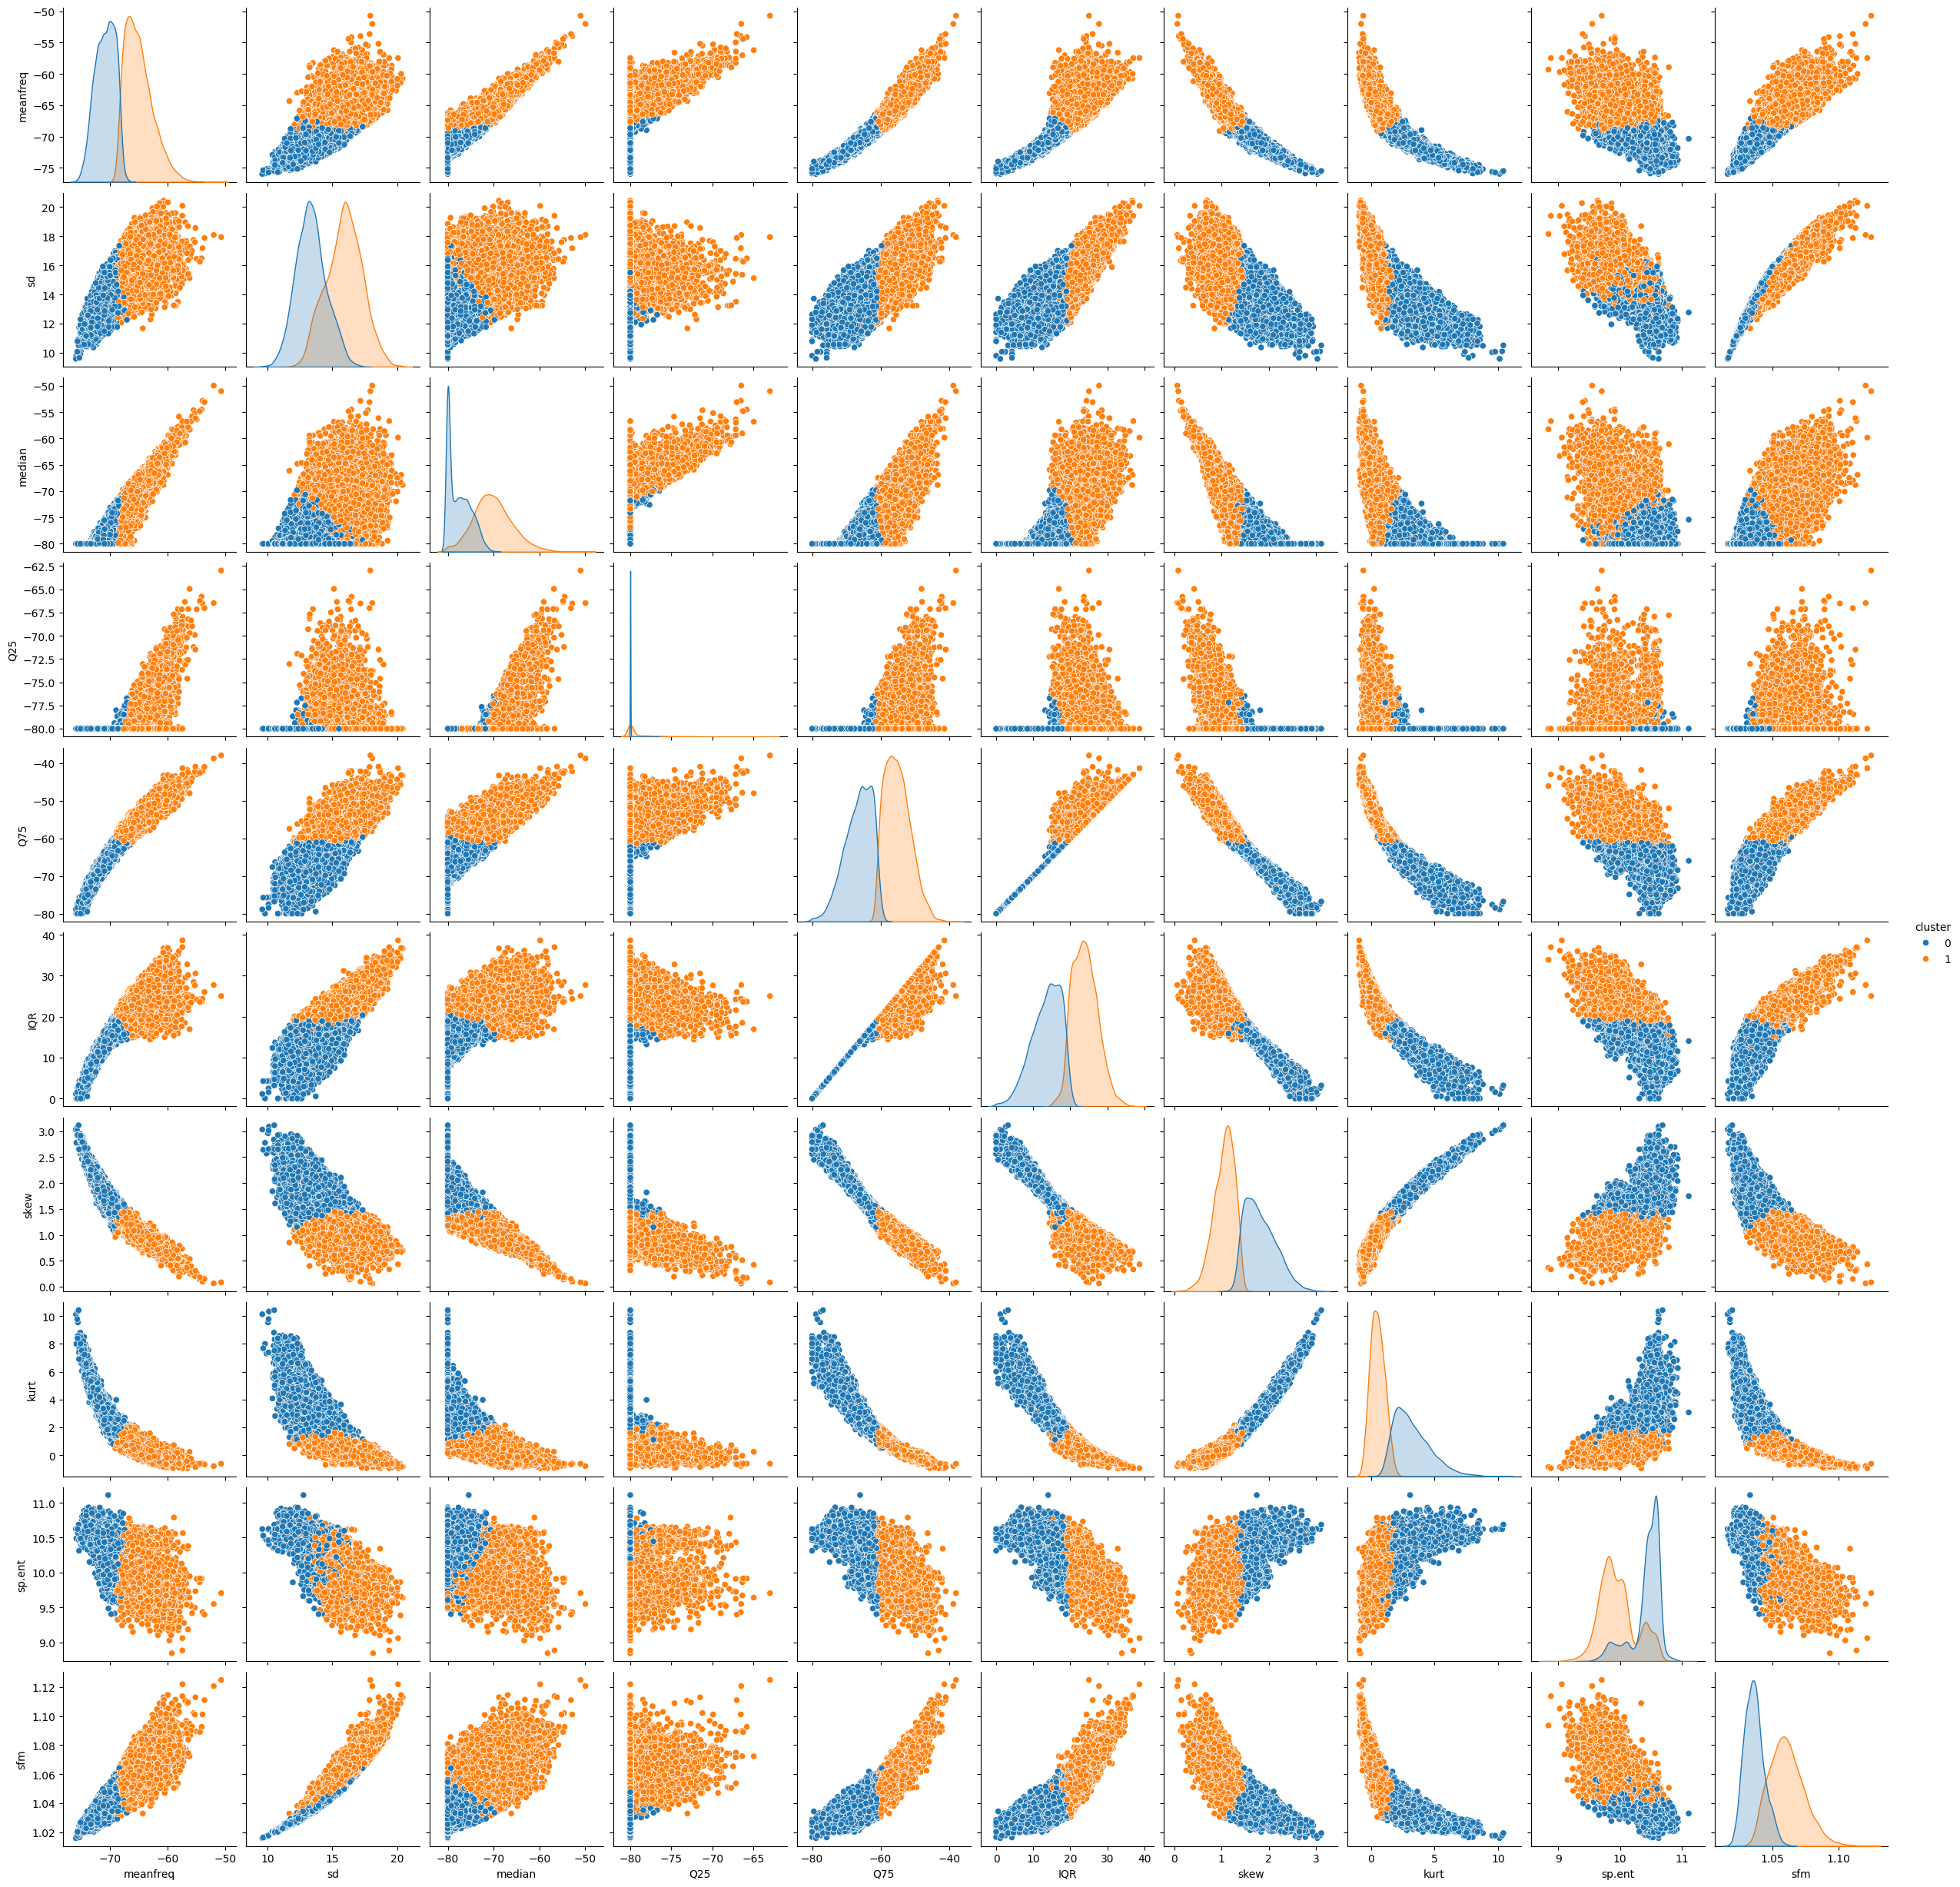

Clustering results have been saved to 'mel_spectrogram_with_clusters.csv'


In [18]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных из CSV файла
data = df
# Извлечение признаков для кластеризации
features = data.drop(columns=['filename'])

# Применение алгоритма K-Means для кластеризации
kmeans = KMeans(n_clusters=2, random_state=0).fit(features)

# Добавление меток кластеров к данным
data['cluster'] = kmeans.labels_

# Визуализация результатов кластеризации
sns.pairplot(data, hue='cluster', diag_kind='kde')
plt.show()

# Сохранение результатов в новый CSV файл
data.to_csv('mel_spectrogram_with_clusters.csv', index=False)

print("Clustering results have been saved to 'mel_spectrogram_with_clusters.csv'")


In [19]:
import os
import librosa
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis, entropy
from tqdm import tqdm

# Функция для вычисления статистических характеристик
def calculate_statistics(spec):
    meanfreq = np.mean(spec)
    sd = np.std(spec)
    median = np.median(spec)
    Q25 = np.percentile(spec, 25)
    Q75 = np.percentile(spec, 75)
    IQR = Q75 - Q25
    skewness = skew(spec.flatten())  # flatten to treat the entire spectrogram as a single vector
    kurt = kurtosis(spec.flatten())
    sp_ent = entropy(spec.flatten())
    sfm = np.mean(spec**2) / (np.mean(np.abs(spec))**2)
    return [meanfreq, sd, median, Q25, Q75, IQR, skewness, kurt, sp_ent, sfm]

# Путь к папке с аудиофайлами
train_folder = 'test'

# Инициализировать пустой DataFrame для хранения результатов
all_data = pd.DataFrame()

# Получить список файлов в папке train
files = [f for f in os.listdir(train_folder) if f.endswith('.wav')]

# Обход всех файлов с использованием tqdm
for filename in tqdm(files, desc="Processing audio files"):
    file_path = os.path.join(train_folder, filename)
    # Загрузить аудио файл
    y, sr = librosa.load(file_path)

    # Вычислить спектрограмму мел-частот
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)

    # Преобразовать спектрограмму мел-частот в логарифмическую шкалу (дБ)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

    # Вычислить статистические характеристики для всей спектрограммы
    stats = calculate_statistics(mel_spec_db)

    # Преобразовать список статистических характеристик в DataFrame
    columns = ['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm']
    stats_df = pd.DataFrame([stats], columns=columns)

    # Добавить имя файла как дополнительный столбец для идентификации
    stats_df['filename'] = filename

    # Добавить данные в общий DataFrame
    all_data = pd.concat([all_data, stats_df], ignore_index=True)

# Сохранить объединенный DataFrame в CSV файл
all_data.to_csv('mel_spectrogram_statistics_dataset.csv', index=False)

print("Mel spectrogram statistics dataset has been saved to 'mel_spectrogram_test.csv'")


Processing audio files: 100%|██████████| 3413/3413 [02:33<00:00, 22.26it/s]


Mel spectrogram statistics dataset has been saved to 'mel_spectrogram_test.csv'


women -0
man-1

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('mel_spectrogram_with_clusters.csv')

In [3]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
data = df

In [5]:
X = data.drop(columns=['filename', 'cluster'])
y = data['cluster']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [6]:
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Обучение модели
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [7]:

# Прогнозирование на тестовой выборке
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 99.54%


In [8]:
model.save_model('xgboost_model.json')

In [9]:
test_data = pd.read_csv('mel_spectrogram_test.csv')

# Извлечение признаков (предполагается, что тестовый набор данных имеет те же признаки, что и обучающий)
X_test_final = test_data.drop(columns=['filename'])

In [10]:
test_data['predicted_gender'] = model.predict(X_test_final)

# Сохранение результатов в новый CSV файл
test_data.to_csv('test_dataset_with_predictions.csv', index=False)

print("Predictions have been saved to 'test_dataset_with_predictions.csv'")

Predictions have been saved to 'test_dataset_with_predictions.csv'


In [16]:
import pandas as pd
import random
import librosa
import IPython.display as ipd
import os
# Загрузка тестового набора данных с предсказанными метками
test_data = pd.read_csv('test_dataset_with_predictions.csv')

# Выбор случайной аудиозаписи
random_record = test_data.sample(n=1).iloc[0]

# Получение информации об аудиозаписи
filename = random_record['filename']
predicted_gender = random_record['predicted_gender']

# Вывод информации
gender_str = 'Male' if predicted_gender == 1 else 'Female'
print(f"Filename: {filename}")
print(f"Predicted Gender: {gender_str}")

# Загрузка и воспроизведение аудиозаписи
audio_path = os.path.join('test', filename)
y, sr = librosa.load(audio_path, sr=None)
ipd.display(ipd.Audio(data=y, rate=sr))

Filename: 0b123967062cc82f81a3eabc0d60dfb9.wav
Predicted Gender: Male


если надо выше точность вот данные что бы дотюнить модель

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score
import xgboost as xgb
from scipy.stats import randint, uniform

# Загрузка данных из CSV файла (предполагается, что данные содержат колонку 'gender' для обучения)
data = pd.read_csv('mel_spectrogram_with_clusters.csv')

# Извлечение признаков и меток
X = data.drop(columns=['filename', 'cluster'])
y = data['cluster']

# Нормализация признаков (если необходимо)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [60]:
# Определение параметров для RandomizedSearchCV
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3)
}

# Инициализация модели XGBoost
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Инициализация RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', verbose=2, random_state=42, n_jobs=-1)

# Обучение модели с подбором гиперпараметров
random_search.fit(X_train, y_train)

# Лучшие параметры
best_params = random_search.best_params_
print(f"Best parameters: {best_params}")

# Обучение модели с лучшими параметрами
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)

# Прогнозирование на тестовой выборке
y_pred = best_model.predict(X_test)

# Оценка точности
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'colsample_bytree': 0.9547670231482533, 'learning_rate': 0.207283867690103, 'max_depth': 3, 'n_estimators': 787, 'subsample': 0.7281024303484277}
Accuracy: 99.54%


In [61]:
best_model.save_model('xgboost_model_optimized.json')
print("Model saved to xgboost_model_optimized.json")

Model saved to xgboost_model_optimized.json


In [70]:
# Функция для вычисления статистических характеристик
def calculate_statistics(spec):
    meanfreq = np.mean(spec)
    sd = np.std(spec)
    median = np.median(spec)
    Q25 = np.percentile(spec, 25)
    Q75 = np.percentile(spec, 75)
    IQR = Q75 - Q25
    skewness = skew(spec.flatten())  # flatten to treat the entire spectrogram as a single vector
    kurt = kurtosis(spec.flatten())
    sp_ent = entropy(spec.flatten())
    sfm = np.mean(spec**2) / (np.mean(np.abs(spec))**2)
    return [meanfreq, sd, median, Q25, Q75, IQR, skewness, kurt, sp_ent, sfm]

# Функция для предсказания пола по аудиофайлу
def predict_gender(audio_path, model_path, scaler_path=None):
    # Загрузка аудио файла
    y, sr = librosa.load(audio_path, sr=None)

    # Вычисление спектрограммы мел-частот
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)

    # Преобразование спектрограммы мел-частот в логарифмическую шкалу (дБ)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

    # Обработка бесконечных значений
    mel_spec_db = np.where(np.isfinite(mel_spec_db), mel_spec_db, -100)

    # Вычисление статистических характеристик для всей спектрограммы
    features = calculate_statistics(mel_spec_db)

    # Преобразование признаков в DataFrame
    features_df = pd.DataFrame([features], columns=['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm'])

    # Нормализация признаков (если необходимо)
    #if scaler_path:
    #    scaler = StandardScaler()
    #    features_df = scaler.transform(features_df)

    # Загрузка модели
    model = xgb.XGBClassifier()
    model.load_model(model_path)

    # Прогнозирование
    predicted_gender = model.predict(features_df)[0]

    return 'Male' if predicted_gender == 1 else 'Female'

# Пример использования
audio_path = 'test\\ff1a6c7f67183937da8657c20440eef6.wav'
model_path = 'xgboost_model_optimized.json'

predicted_gender = predict_gender(audio_path, model_path)
print(f"The predicted gender for the audio file is: {predicted_gender}")


The predicted gender for the audio file is: Female


определение пола по любой аудио записи

In [47]:
import os
import librosa
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis, entropy
import xgboost as xgb

# Функция для вычисления статистических характеристик
def calculate_statistics(spec):
    meanfreq = np.mean(spec)
    sd = np.std(spec)
    median = np.median(spec)
    Q25 = np.percentile(spec, 25)
    Q75 = np.percentile(spec, 75)
    IQR = Q75 - Q25
    skewness = skew(spec.flatten())  # flatten to treat the entire spectrogram as a single vector
    kurt = kurtosis(spec.flatten())
    sp_ent = entropy(spec.flatten())
    sfm = np.mean(spec**2) / (np.mean(np.abs(spec))**2)
    return [meanfreq, sd, median, Q25, Q75, IQR, skewness, kurt, sp_ent, sfm]

# Функция для предсказания пола по аудиофайлу
def predict_gender(audio_path, model_path):
    # Загрузка аудио файла
    y, sr = librosa.load(audio_path, sr=None)

    # Вычисление спектрограммы мел-частот
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)

    # Преобразование спектрограммы мел-частот в логарифмическую шкалу (дБ)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

    # Обработка бесконечных значений
    mel_spec_db = np.where(np.isfinite(mel_spec_db), mel_spec_db, -100)

    # Вычисление статистических характеристик для всей спектрограммы
    features = calculate_statistics(mel_spec_db)

    # Преобразование признаков в DataFrame
    features_df = pd.DataFrame([features], columns=['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm'])

    # Загрузка модели
    model = xgb.XGBClassifier()
    model.load_model(model_path)

    # Прогнозирование
    predicted_gender = model.predict(features_df)[0]

    return 'Male' if predicted_gender == 1 else 'Female'

# Пример использования
audio_path = 'test\\fe6efa805d915906a410b9453df27bfa.wav'
model_path = 'xgboost_model_optimized.json'

predicted_gender = predict_gender(audio_path, model_path)
print(f"The predicted gender for the audio file is: {predicted_gender}")


The predicted gender for the audio file is: Male


catboost

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import accuracy_score

# Загрузка данных из CSV файла (предполагается, что данные содержат колонку 'gender' для обучения)
data = pd.read_csv('mel_spectrogram_with_clusters.csv')

# Извлечение признаков и меток
X = data.drop(columns=['filename', 'cluster'])
y = data['cluster']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Создание модели CatBoost
model = CatBoostClassifier(iterations=1000, depth=6, learning_rate=0.1, loss_function='Logloss', verbose=100)

# Обучение модели
model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=100)

# Прогнозирование на тестовой выборке
y_pred = model.predict(X_test)

# Оценка точности
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Сохранение модели
model.save_model('catboost_model.cbm')


0:	learn: 0.4478847	test: 0.4489488	best: 0.4489488 (0)	total: 174ms	remaining: 2m 53s
100:	learn: 0.0030992	test: 0.0129405	best: 0.0129405 (100)	total: 1.02s	remaining: 9.09s
200:	learn: 0.0020997	test: 0.0124639	best: 0.0124619 (135)	total: 1.69s	remaining: 6.73s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.0124618954
bestIteration = 135

Shrink model to first 136 iterations.
Accuracy: 99.54%


In [18]:
import os
import librosa
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis, entropy
from catboost import CatBoostClassifier

# Функция для вычисления статистических характеристик
def calculate_statistics(spec):
    meanfreq = np.mean(spec)
    sd = np.std(spec)
    median = np.median(spec)
    Q25 = np.percentile(spec, 25)
    Q75 = np.percentile(spec, 75)
    IQR = Q75 - Q25
    skewness = skew(spec.flatten())  # flatten to treat the entire spectrogram as a single vector
    kurt = kurtosis(spec.flatten())
    sp_ent = entropy(spec.flatten())
    sfm = np.mean(spec**2) / (np.mean(np.abs(spec))**2)
    return [meanfreq, sd, median, Q25, Q75, IQR, skewness, kurt, sp_ent, sfm]

# Функция для предсказания пола по аудиофайлу
def predict_gender(audio_path, model_path):
    # Загрузка аудио файла
    y, sr = librosa.load(audio_path, sr=None)

    # Вычисление спектрограммы мел-частот
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)

    # Преобразование спектрограммы мел-частот в логарифмическую шкалу (дБ)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

    # Обработка бесконечных значений
    mel_spec_db = np.where(np.isfinite(mel_spec_db), mel_spec_db, -100)

    # Вычисление статистических характеристик для всей спектрограммы
    features = calculate_statistics(mel_spec_db)

    # Преобразование признаков в DataFrame
    features_df = pd.DataFrame([features], columns=['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm'])

    # Загрузка модели
    model = CatBoostClassifier()
    model.load_model(model_path)

    # Прогнозирование
    predicted_gender = model.predict(features_df)[0]

    return 'Male' if predicted_gender == 1 else 'Female'

# Пример использования
audio_path = 'Голос-002.wav'
model_path = 'catboost_model.cbm'

predicted_gender = predict_gender(audio_path, model_path)
print(f"The predicted gender for the audio file is: {predicted_gender}")


The predicted gender for the audio file is: Male
